In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("mpg_raw.csv")

In [3]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [4]:
df.describe

<bound method NDFrame.describe of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle mali

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.shape

(398, 9)

In [7]:
df.ndim

2

In [8]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [9]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].mean())

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

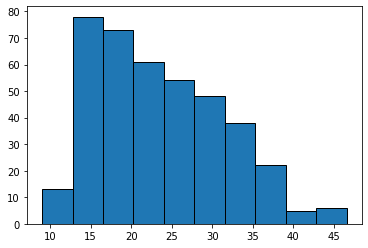

In [10]:
plt.hist(df['mpg'],edgecolor="black")

(array([ 6., 15., 50., 86., 92., 80., 45., 13.,  7.,  4.]),
 array([ 8.  ,  9.68, 11.36, 13.04, 14.72, 16.4 , 18.08, 19.76, 21.44,
        23.12, 24.8 ]),
 <BarContainer object of 10 artists>)

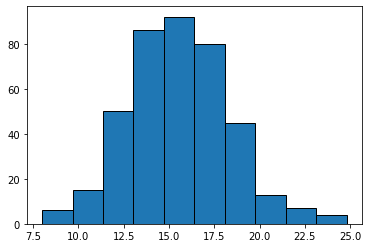

In [11]:
plt.hist(df['acceleration'],edgecolor="black")

<AxesSubplot:ylabel='acceleration'>

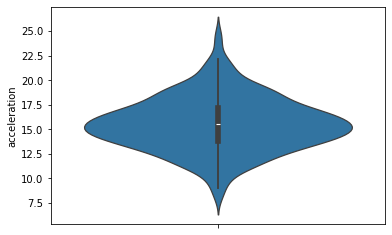

In [12]:
sns.violinplot(y='acceleration',data=df)

<AxesSubplot:ylabel='horsepower'>

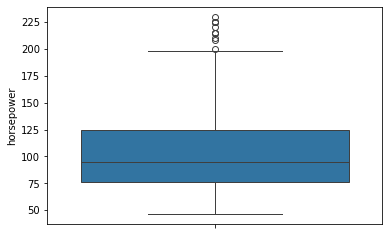

In [13]:
sns.boxplot(y='horsepower',data=df)

In [14]:
q1=df['horsepower'].quantile(0.25)
q3=df['horsepower'].quantile(0.55)
iqr=q3-q1
lw=q1-1.5*iqr
hw=q3+1.5*iqr
tmpdf=df[df['horsepower'] < hw]

<AxesSubplot:ylabel='horsepower'>

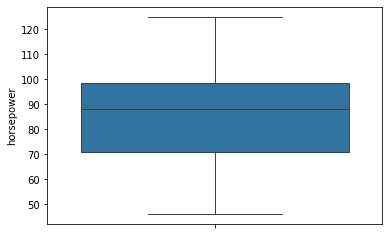

In [15]:
sns.boxplot(y='horsepower',data=tmpdf)

In [16]:
tmpdf=df.copy()
scaler=StandardScaler()
continous=tmpdf.select_dtypes(include=['float64','int64']).columns
tmpdf[continous]=scaler.fit_transform(tmpdf[continous])

In [17]:
tmpdf

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,-0.706439,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,usa,chevrolet chevelle malibu
1,-1.090751,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,usa,buick skylark 320
2,-0.706439,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,usa,plymouth satellite
3,-0.962647,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,usa,amc rebel sst
4,-0.834543,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.484111,-0.213324,0.011586,1.621983,usa,ford mustang gl
394,2.624265,-0.856321,-0.925936,-1.375302,-0.993671,3.279296,1.621983,europe,vw pickup
395,1.087017,-0.856321,-0.561039,-0.536534,-0.798585,-1.440730,1.621983,usa,dodge rampage
396,0.574601,-0.856321,-0.705077,-0.667591,-0.408411,1.100822,1.621983,usa,ford ranger


(array([208.,  87., 103.]),
 array([3.        , 4.66666667, 6.33333333, 8.        ]),
 <BarContainer object of 3 artists>)

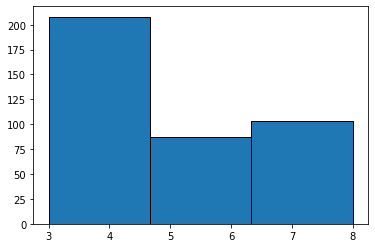

In [18]:
plt.hist(df['cylinders'],edgecolor="black",bins=3)

(array([121., 113.,  77.,  63.,  24.]),
 array([1613. , 2318.4, 3023.8, 3729.2, 4434.6, 5140. ]),
 <BarContainer object of 5 artists>)

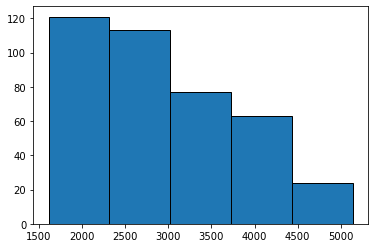

In [19]:
plt.hist(df['weight'],edgecolor="black",bins=5)

<AxesSubplot:xlabel='model_year', ylabel='count'>

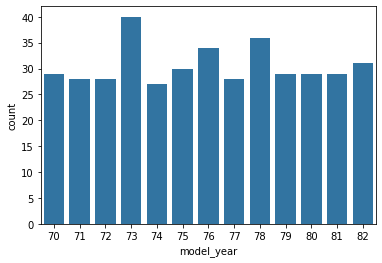

In [20]:
sns.countplot(x='model_year',data=df)

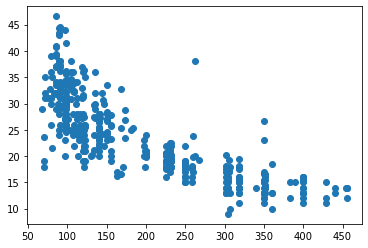

In [21]:
plt.scatter(df['displacement'],df['mpg'])

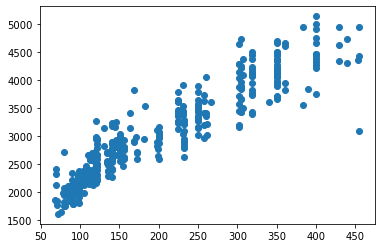

In [22]:
plt.scatter(df['displacement'],df['weight'])

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

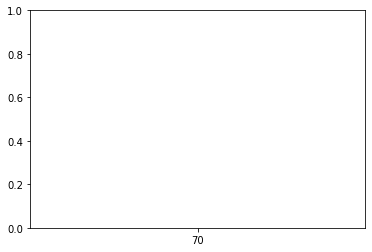

In [23]:
sns.pointplot(y='displacement',x='model_year',data=df)

<AxesSubplot:>

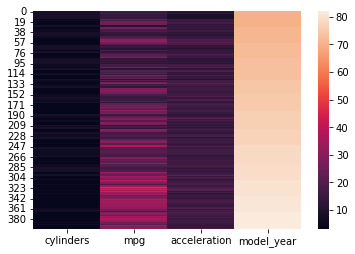

In [24]:
sb.heatmap(data=df[['cylinders','mpg','acceleration','model_year']])

<AxesSubplot:>

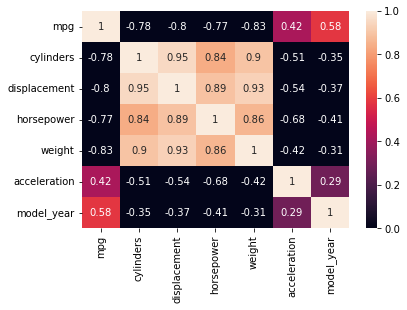

In [25]:
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,vmin=0,vmax=1)